# Sorting algorithms

1. mergesort
2. quick sort

## Mergesort


In [1]:
import numpy as np

In [2]:
def merge(a, left, mid, right):
    it1 = 0
    it2 = 0
    result = [i for i in range(right)]
    
    while (left + it1 < mid) and (mid + it2 < right):
        if a[left + it1] < a[mid + it2]:
            result[it1+it2] = a[left + it1]
            it1 += 1
        else:
            result[it1 + it2] = a[mid + it2]
            it2 += 1
    
    while left + it1 < mid:
        result[it1 + it2] = a[left + it1]
        it1 += 1
    
    while mid + it2 < right:
        result[it1 + it2] = a[mid + it2]
        it2 += 1
    
    for i in range(it1+it2):
        a[left+i] = result[i]

def mergeSortRecursive(a, left, right):
    if left + 1 >= right:
        return
    mid = round((left + right) / 2)
    mergeSortRecursive(a, left, mid)
    mergeSortRecursive(a, mid, right)
    merge(a, left, mid, right)

In [3]:
arr = np.random.randint(0, 5400, 1000).tolist()
print(arr)
mergeSortRecursive(arr, 0, len(arr))
print(arr)

[781, 3812, 3680, 2223, 2320, 1481, 357, 1575, 3134, 4260, 155, 1759, 5312, 685, 5034, 337, 2596, 1297, 4014, 2579, 66, 130, 5053, 2727, 797, 5346, 1654, 1265, 1245, 1090, 510, 1800, 4675, 53, 5227, 1206, 1955, 886, 2243, 318, 3108, 2092, 1634, 2813, 108, 2004, 4533, 3446, 5306, 445, 3756, 2191, 637, 4233, 2507, 2284, 2476, 1613, 1384, 2917, 1792, 627, 1280, 32, 3065, 2310, 4103, 4554, 182, 1494, 1433, 3189, 1716, 786, 544, 5177, 3659, 5224, 3906, 3648, 3025, 3133, 1634, 4662, 3396, 585, 2325, 2937, 2512, 15, 5380, 3283, 452, 2117, 2269, 4597, 5276, 4208, 99, 4587, 68, 1892, 737, 4681, 3597, 521, 827, 4119, 4388, 2167, 2510, 592, 3481, 4361, 4183, 4622, 1809, 3402, 175, 663, 2511, 4733, 4401, 2330, 5387, 5342, 5291, 4389, 2079, 5015, 3386, 1611, 715, 2481, 450, 3468, 4216, 3235, 1388, 4165, 3633, 3945, 4165, 2831, 922, 4243, 687, 3869, 3323, 3164, 1571, 2430, 505, 4410, 3891, 631, 1883, 2189, 4904, 5338, 3738, 4873, 5383, 3574, 540, 3352, 838, 3130, 1385, 2675, 3836, 60, 412, 3020, 321

In [5]:
def merge1(x, y):
    if len(x) == 0:
        return y
    if len(y) == 0:
        return x
    if x[0] <= y[0]:
        return x[:1] + merge1(x[1:], y)
    if x[0] > y[0]:
        return y[:1] + merge1(x, y[1:])

def mergeSort(a):
    m = round(len(a)/2)
    if len(a) > 1:
        return merge1(mergeSort(a[:m]), mergeSort(a[m:]))
    else:
        return a

In [6]:
arr = [54, 24, 17, 13 , 3,94 ,91 ,44 ,39 ,35]
print(arr)
new_arr = mergeSort(arr)
new_arr

[54, 24, 17, 13, 3, 94, 91, 44, 39, 35]


[3, 13, 17, 24, 35, 39, 44, 54, 91, 94]

## Quick sort

Time complexity: 

Best: $O(n * log (n))$

Worst: $O(n^2)$

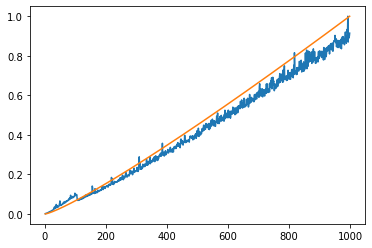

In [31]:
import time
import matplotlib.pyplot as plt
import math

def partition(a, low, high):
    pivot = a[(high+low)//2]
    i = low
    j = high
    while i <= j:
        while a[i] < pivot:         
            i += 1
        while a[j] > pivot:
            j -= 1

        if i >= j:
            break
        a_i = a[i]
        a[i] = a[j]
        a[j] = a_i
        i += 1
        j -= 1
    return j
        
def qsort(a, l, h):
    if l < h:
        p = partition(a, l, h)
        qsort(a, l, p)
        qsort(a, p+1, h)

x, y, y1 = [], [], []    
n = 1000
for i in range(1, n):        
    x.append(i)
    arr = np.random.randint(0, 1000, i).tolist()
    arr_len = len(arr)
    start_time = time.time()
    qsort(arr, 0, arr_len-1)
    end_time = time.time() - start_time
    y.append(end_time)
    y1.append(i * math.log(i))

y_max = max(y)
y1_max = max(y1)
y = [el/y_max for el in y]
y1 = [el/y1_max for el in y1]
plt.plot(x, y)
plt.plot(x, y1)

In [53]:
def partition1(a, l, h):
    p = a[int((l+h)//2)]
    i = l
    j = h
    while True:
        while a[i] < p:
            i += 1
        while a[j] > p:
            j -= 1
        if i >= j:
            return j
        a_i = a[i]
        a[i] = a[j]
        a[j] = a_i
        i += 1
        j -= 1
        
def quicksort1(a, l, h):
    if l < h:
        p = partition1(a, l, h)
        quicksort1(a, l, p)
        quicksort1(a, p+1, h)

s = np.random.randint(0, 15000, 100).tolist()
print(s)

quicksort1(s, 0, len(s)-1)
print(s)

[9449, 3784, 2895, 2933, 1477, 8633, 1507, 237, 9920, 4463, 6944, 3124, 2441, 4934, 9211, 48, 6802, 7856, 7038, 5288, 8906, 14473, 7796, 13872, 9575, 5284, 492, 5910, 7788, 12211, 10453, 3691, 3334, 13053, 11198, 6000, 9422, 1241, 2620, 842, 3821, 5019, 2097, 5603, 3805, 13460, 8948, 12691, 5310, 11847, 14288, 511, 4451, 6269, 12473, 1345, 8370, 9845, 14806, 2394, 9620, 11499, 12431, 4334, 10481, 2130, 9851, 14106, 9966, 1843, 7826, 11287, 13016, 14677, 2429, 10060, 12995, 8754, 12794, 14474, 12215, 7369, 4243, 13280, 5566, 11631, 6936, 8680, 7037, 6003, 2825, 7767, 13493, 14423, 2510, 14886, 9166, 9745, 2121, 14008]
[48, 237, 492, 511, 842, 1241, 1345, 1477, 1507, 1843, 2097, 2121, 2130, 2394, 2429, 2441, 2510, 2620, 2825, 2895, 2933, 3124, 3334, 3691, 3784, 3805, 3821, 4243, 4334, 4451, 4463, 4934, 5019, 5284, 5288, 5310, 5566, 5603, 5910, 6000, 6003, 6269, 6802, 6936, 6944, 7037, 7038, 7369, 7767, 7788, 7796, 7826, 7856, 8370, 8633, 8680, 8754, 8906, 8948, 9166, 9211, 9422, 9449, 95

In [10]:
class myqueue:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def inject(self, item):
        self.items.insert(0, item)
    def eject(self):
        return self.items.pop()
    def size(self):
        return len(self.items)

def merge2(x, y):
    if len(x) == 0:
        return y
    if len(y) == 0:
        return x
    if x[0] <= y[0]:
        return x[:1] + merge2(x[1:], y)
    else:
        return y[:1] + merge2(x, y[1:])

def iterativeMergeSort(a):
    q = myqueue()
    [q.inject([el]) for el in a]
    while q.size() > 1:
        q.inject(merge2(q.eject(), q.eject()))
    return q.eject()

In [12]:
arr = np.random.randint(0, 5400, 2000).tolist()
print(arr)
new_arr = iterativeMergeSort(arr)
print(new_arr)

[3362, 1278, 1959, 3453, 1454, 989, 5226, 99, 2582, 4065, 328, 2983, 3628, 776, 136, 3042, 2703, 4952, 129, 397, 4597, 2723, 4633, 2745, 5301, 977, 932, 609, 4315, 958, 49, 2872, 3838, 294, 576, 2947, 241, 3603, 909, 5240, 3130, 2637, 1547, 192, 4207, 798, 1853, 108, 2087, 1477, 846, 3720, 1429, 3451, 729, 952, 312, 1969, 3598, 966, 4682, 2834, 1977, 2357, 1387, 1919, 4067, 2429, 3766, 2244, 302, 1161, 38, 3100, 1601, 874, 4329, 3979, 579, 2964, 4449, 4019, 1348, 327, 5394, 4420, 1482, 490, 2453, 1505, 805, 641, 1215, 434, 4414, 5357, 3570, 1500, 4959, 1141, 3791, 2382, 1705, 869, 3882, 660, 4703, 3052, 1914, 3437, 4467, 1540, 1630, 38, 1631, 2576, 672, 4572, 3087, 3443, 4660, 4403, 4636, 4458, 3931, 1405, 513, 621, 1990, 2354, 915, 4572, 2598, 2837, 110, 4531, 2491, 3198, 4806, 385, 1501, 4555, 4931, 1397, 3676, 4205, 2360, 111, 3371, 2503, 4641, 3166, 4814, 190, 3682, 3309, 5009, 2209, 850, 895, 2954, 4501, 4009, 1484, 4924, 1623, 2456, 2633, 106, 5222, 1800, 3012, 3997, 2827, 3622, 

In [ ]:
class MergeSorter: